# CSCI 4155 Machine Learning - Group Project

---
Group 13:
- [Corentin Goetghebeur](cr453043@dal.ca) - B00945496
- [Gabriel Marchand](gb614643@dal.ca) - B00929349
- [Rinchen Toh](rn835427@dal.ca) - B00944448
---

This notebook is part of a group project taking place during the fall semester of 2022 in the CSCI 4155 Machine Learning class in Dalhousie University (NS, Canada).

This project aims to compare different machine learning algorithms to detect network intrusions using the KDD Cup'99 dataset.

---

This notebook contains the classification using the Naive Bayes algorithm.

# Naive Bayes

In [ ]:
# Importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Loading datasets

The dataset has already been processed and split in the preprocessing notebook.

In [ ]:
# loading datasets
X_train = pd.read_csv("kdd99_training_data.csv")
X_test = pd.read_csv("kdd99_testing_data.csv")
y_train = pd.read_csv("kdd99_training_labels.csv")
y_test = pd.read_csv("kdd99_testing_labels.csv")

In [ ]:
print(f"Training dataset shape: {X_train.shape}")
print(f"Testing dataset shape: {X_test.shape}")

print(f"Training labels: {y_train.shape}")
print(f"Testing labels: {y_test.shape}")

Training dataset shape: (370515, 32)
Testing dataset shape: (123505, 32)
Training labels: (370515, 2)
Testing labels: (123505, 2)


In [ ]:
y_train = y_train['label']
y_test = y_test['label']

In [ ]:
print(f"Labels: {y_train.unique()}")

['normal' 'dos' 'r2l' 'probe' 'u2r']


## Scaling

To use the Naive Bayes algorithm, we will scale the training and testing dataset using a `MinMaxScaler`.

In [ ]:
# scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training

In [ ]:
# training
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
print(f"Training score: {model.score(X_train, y_train)}")
print(f"Testing score: {model.score(X_test, y_test)}")

Training score: 0.928710038729876
Testing score: 0.9275818792761427


In [ ]:
y_predicted = model.predict(X_test)

## Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, y_predicted)
report = classification_report(y_test, y_predicted)

print(report)

              precision    recall  f1-score   support

         dos       0.98      0.99      0.98     97676
      normal       0.97      0.69      0.81     24482
       probe       0.16      0.99      0.28      1056
         r2l       0.43      0.44      0.43       279
         u2r       0.02      0.83      0.03        12

    accuracy                           0.93    123505
   macro avg       0.51      0.79      0.51    123505
weighted avg       0.97      0.93      0.94    123505



In [ ]:
# building annotations
y_labels = ['dos', 'normal', 'probe', 'r2l', 'u2r']
labels = []
for i in range(5):
  for j in range(5):
    labels.append(str(f"Real {y_labels[i]}\nPredicted {y_labels[j]}\n{conf_matrix[i, j]}"))

labels = np.asarray(labels).reshape(5, 5)

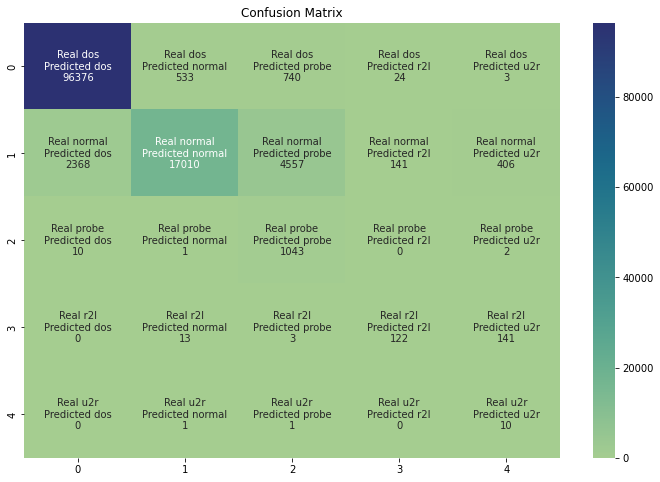

In [ ]:
# confusion matrix visualization

plt.figure(figsize=(12, 8))
plt.title("Confusion Matrix")
sns.heatmap(conf_matrix, annot=labels, cmap='crest', fmt='')
plt.show()

**Reminder on label proportions:**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


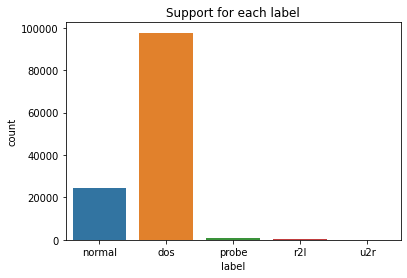


dos       0.790867
normal    0.198227
probe     0.008550
r2l       0.002259
u2r       0.000097
Name: label, dtype: float64

dos       97676
normal    24482
probe      1056
r2l         279
u2r          12
Name: label, dtype: int64


In [ ]:
plt.figure()
plt.title("Support for each label")
sns.countplot(y_test)
plt.show()

print(f"\n{y_test.value_counts() / y_test.shape[0]}\n\n{y_test.value_counts()}")

## Conclusion

Overall, the model has a good accuracy (93%), but the results can vary depending on the label since they have very different support.

The DOS attack has the best results in all metrics. This makes sense because it has the biggest support (around 80% of all rows).

The normal label has a good precision but a lower recall, this means most of the predicted normal are normal but some of the normal are predicted as attacks (mostly r2l and dos according to the confusion matrix).

The probe label has a very good recall (99%) but a terrible precision (16%). This means nearly all actual probes were detected but a lot of other labels were classified as probe. 

The r2l label has low precision and recall.

The u2r label has very low precision (2%) but a good recall (83%).

---

The low precision on the last 3 labels is strongly impacted by the drastic difference of support. For example, 406 normal flags were predicted as u2r. This is very low compared to the over 24,000 normal entries but it is nearly 40 times the number of u2r labels.

For this reason, I believe recall is the best metric to use on this dataset.

On a cybersecurity point of view, all the dangerous entries should be identified. To identify all the dangerous connections, the model must have a good recall on the attacks, especially on the U2R, R2L and Probe attacks (the DOS are only dangerous because of their number).

If the model is to be used on an IPS (blocking traffic) instead of an IDS (only monitoring), the availability has to be taken into account as well (normal user should not be blocked) and a good recall on the 'normal' label is needed as well.
